<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Netflix_Stock_Price_handson_Time_Series_19_07_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/NFLX.csv')

In [4]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df = df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])

In [8]:
df.head()

Date   Adj Close
0  2018-02-05  254.259995
1  2018-02-06  265.720001
2  2018-02-07  264.559998
3  2018-02-08  250.100006
4  2018-02-09  249.470001

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Adj Close  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [10]:
df.Date = pd.to_datetime(df.Date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Adj Close  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [14]:
df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [15]:
df.set_index('Date', inplace = True)

In [33]:
df

Adj Close
Date                  
2018-02-05  254.259995
2018-02-06  265.720001
2018-02-07  264.559998
2018-02-08  250.100006
2018-02-09  249.470001
...                ...
2022-01-31  427.140015
2022-02-01  457.130005
2022-02-02  429.480011
2022-02-03  405.600006
2022-02-04  410.170013

[1009 rows x 1 columns]

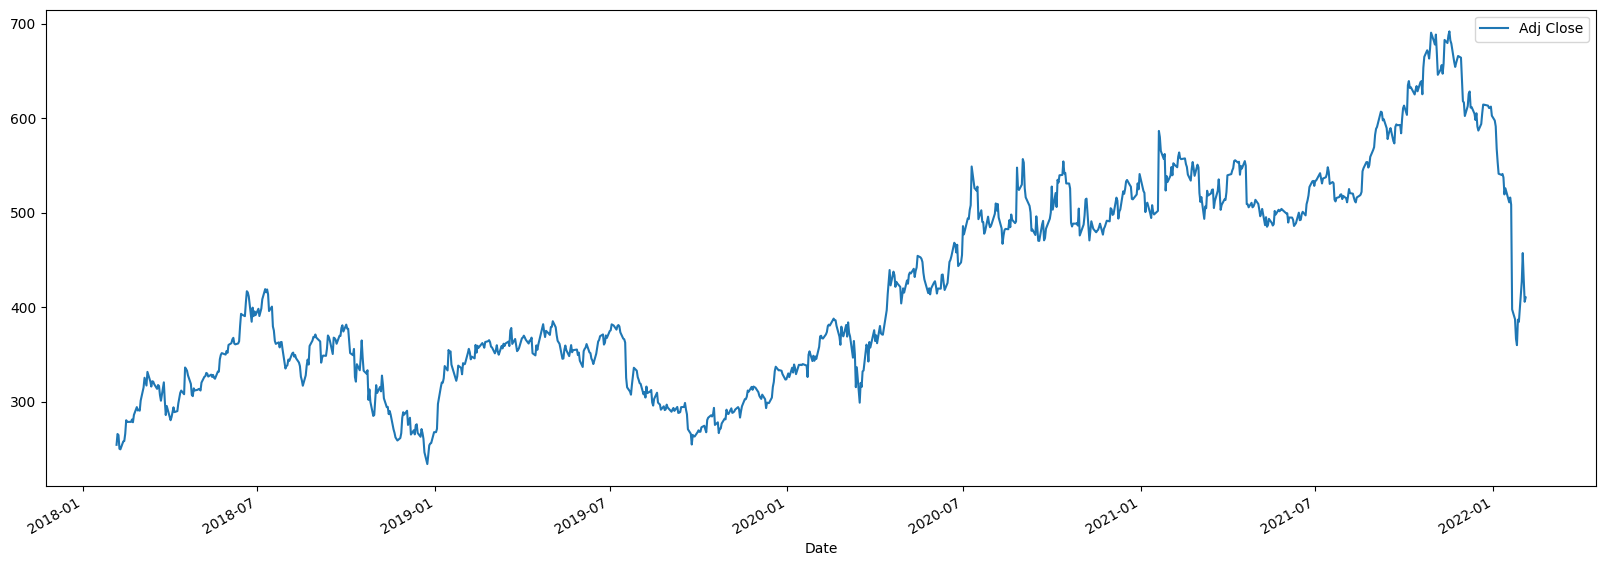

In [20]:
df.plot(figsize = (20, 7))
plt.show()

##ADF Test
* Augmented Dickey–Fuller (ADF) test


Figure(640x480)


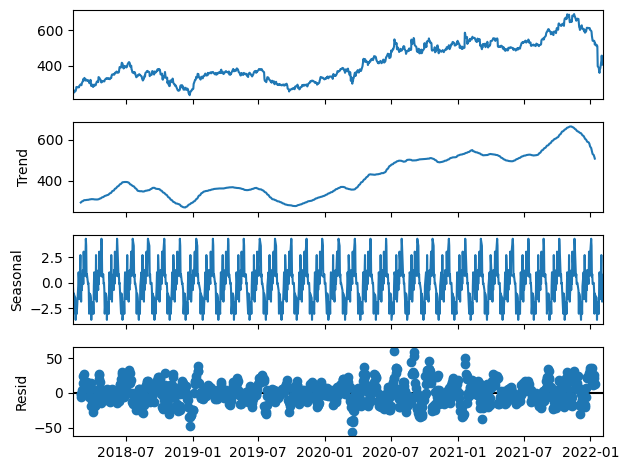

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, period = 30)
print(result.plot())

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
result[1]

np.float64(0.3742289256820759)

* If p value is less than 0.05 -- Data is stationary
* If p value is greater than 0.05 -- Data is not stationary

In [28]:
if result[1] >= 0.05:
  print('The data is not stationary')
else:
    print('The date stationary')



The data is not stationary


## Convert Non stationary data to stationary data

In [30]:
new_data = df - df.shift(1)

In [32]:
df.shift(1)  # All the rows shift down by 1

Adj Close
Date                  
2018-02-05         NaN
2018-02-06  254.259995
2018-02-07  265.720001
2018-02-08  264.559998
2018-02-09  250.100006
...                ...
2022-01-31  384.359985
2022-02-01  427.140015
2022-02-02  457.130005
2022-02-03  429.480011
2022-02-04  405.600006

[1009 rows x 1 columns]

In [34]:
new_data = new_data.dropna()

In [36]:
 new_data

Adj Close
Date                 
2018-02-06  11.460006
2018-02-07  -1.160003
2018-02-08 -14.459992
2018-02-09  -0.630005
2018-02-12   8.480011
...               ...
2022-01-31  42.780030
2022-02-01  29.989990
2022-02-02 -27.649994
2022-02-03 -23.880005
2022-02-04   4.570007

[1008 rows x 1 columns]

In [41]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_data)
result[1]

np.float64(1.5304022754298515e-26)

In [38]:
if result[1] >= 0.05:
  print('The data is not stationary')
else:
    print('The date stationary')

The date stationary


Figure(640x480)


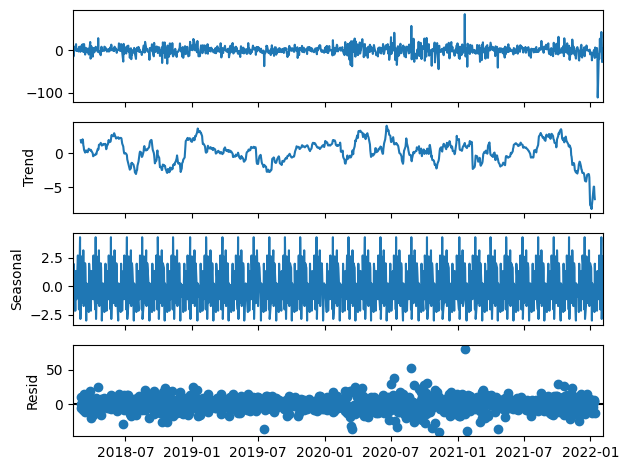

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(new_data, period = 30)
print(result.plot())

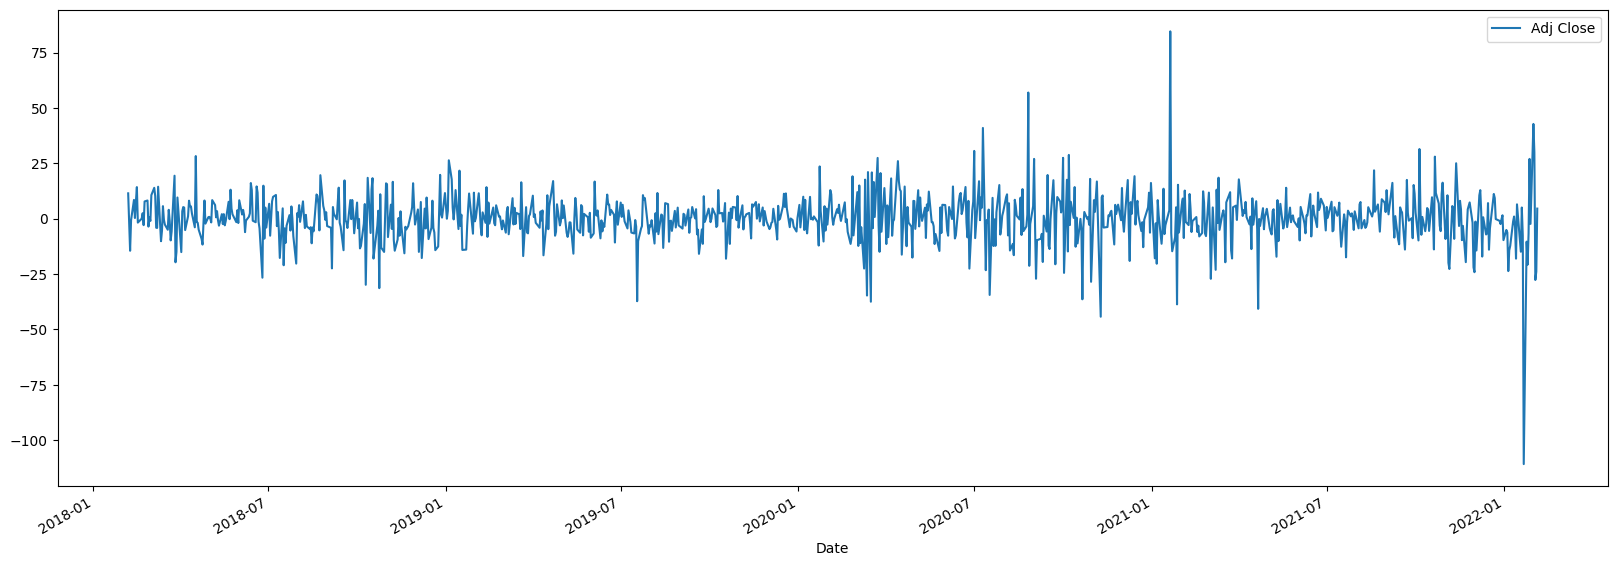

In [43]:
new_data.plot(figsize = (20, 7))
plt.show()

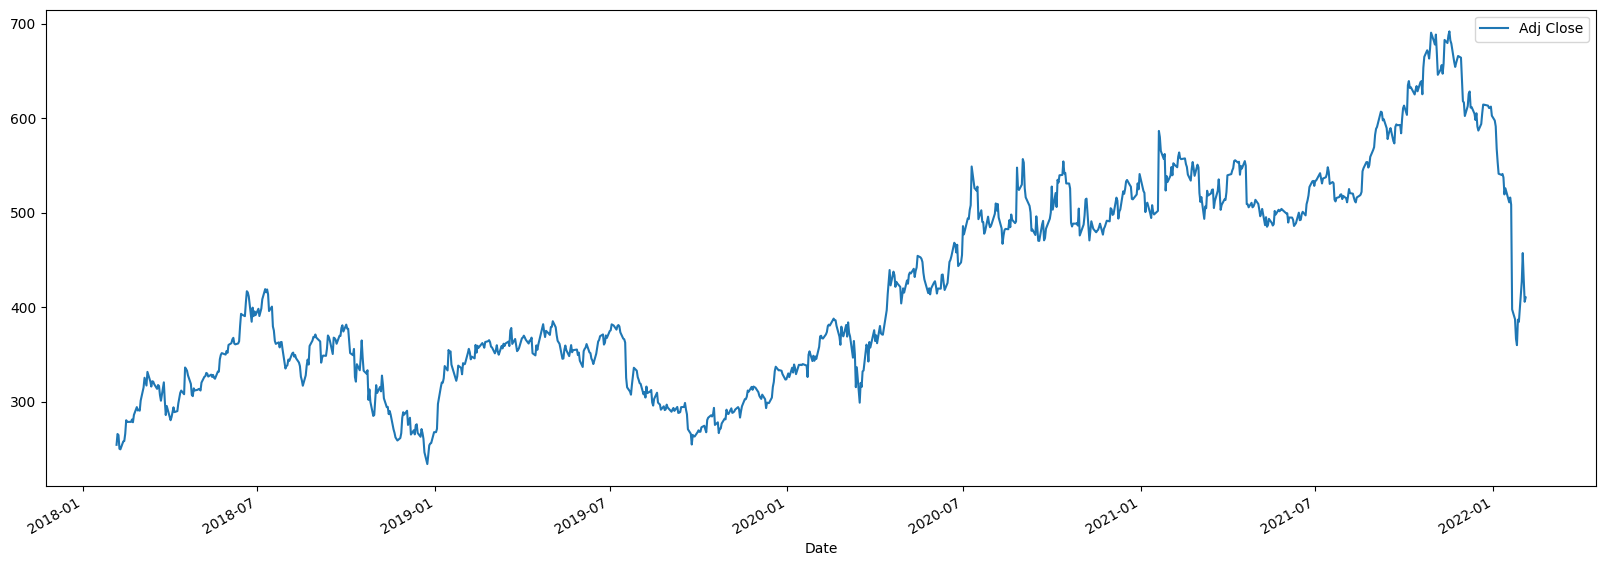

In [44]:
df.plot(figsize = (20, 7))
plt.show()

## Model Building

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:
import itertools
from sklearn.metrics import mean_squared_error


trainsize = int(len(df) * 0.8) # 80 % of data is for model training
trainsize

807

In [54]:
testsize = len(df) - trainsize
testsize

202

## For training we are considering the original data(df), new_data for differencing

In [61]:
train = df['Adj Close'][ :trainsize] # out of 1008 rows i will use 806 for training
test = df['Adj Close'][trainsize:]  # I will use remaining 202 rows for testing

In [56]:
train

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2021-04-14    540.020020
2021-04-15    549.219971
2021-04-16    546.539978
2021-04-19    554.440002
2021-04-20    549.570007
Name: Adj Close, Length: 807, dtype: float64

In [62]:
test

Date
2021-04-21    508.899994
2021-04-22    508.779999
2021-04-23    505.549988
2021-04-26    510.299988
2021-04-27    505.549988
                 ...    
2022-01-31    427.140015
2022-02-01    457.130005
2022-02-02    429.480011
2022-02-03    405.600006
2022-02-04    410.170013
Name: Adj Close, Length: 202, dtype: float64

In [63]:
p = range(0,10)  # past values (0-9)
d = range(1,2) # differencing  (1)  stationary data to
q = range(0,9) # past errors (0-8)

In [64]:
# create a combination of different different values of p,d,q then you can try it in your model
pdq = list(itertools.product(p,d,q))

In [65]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8, 1, 3),
 (8, 1, 4),
 (8, 1, 5),
 (8, 1, 6),
 (8, 1, 7),
 (8, 1, 8),
 (9, 1, 0),
 (9, 1, 1),
 (9,

In [71]:
len(pdq)

90

In [72]:
rmse = []
order1 = []

for i in pdq:
  model = ARIMA(train, order = i)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
  error = np.sqrt(mean_squared_error(test, pred))
  rmse.append(error)
  order1.append(i)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [73]:
# Store the results in dataframe to compare the results

result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE Score'])
result

RMSE Score
(0, 1, 0)   70.841304
(0, 1, 1)   70.789393
(0, 1, 2)   70.780938
(0, 1, 3)   70.787665
(0, 1, 4)   70.699980
...               ...
(9, 1, 4)   70.668896
(9, 1, 5)   76.198333
(9, 1, 6)   70.758093
(9, 1, 7)   70.431412
(9, 1, 8)   70.441428

[90 rows x 1 columns]

In [74]:
result.sort_values(by = 'RMSE Score')

RMSE Score
(7, 1, 8)   70.390895
(8, 1, 4)   70.405923
(7, 1, 6)   70.429026
(9, 1, 7)   70.431412
(9, 1, 8)   70.441428
...               ...
(8, 1, 5)   71.378206
(5, 1, 6)   71.501060
(5, 1, 7)   72.838061
(7, 1, 5)   72.897655
(9, 1, 5)   76.198333

[90 rows x 1 columns]

# Create a Mode

In [75]:
model1 = ARIMA(df['Adj Close'], order = (7, 1, 8))
result1 = model1.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
df['Predictions'] = result1.predict(start=0, end=len(df) - 1)


In [104]:
df

Adj Close  Predictions
Date                               
2018-02-05  254.259995     0.000000
2018-02-06  265.720001   254.258415
2018-02-07  264.559998   265.135865
2018-02-08  250.100006   264.687860
2018-02-09  249.470001   250.690983
...                ...          ...
2022-01-31  427.140015   393.816377
2022-02-01  457.130005   424.630447
2022-02-02  429.480011   453.856015
2022-02-03  405.600006   426.346931
2022-02-04  410.170013   407.650092

[1009 rows x 2 columns]